In [1]:
"""
        SETUP ENVIRONMENT

Choose a game:
- "Cart" # ok for 100 epoch
- "Car" # not good choice
- "Pendulum" # not good choice
- "Lake" # demand more then 1500 epoch
- "Maze" # 100 epoch is OK
- "Toy" # 100 epoch
"""
GAME_NAME = "Toy"
"""
            INITIALIZING AGENTS and ENVIRONMENT
"""
"""-------------------------------------------------------------------"""
from enviroment import *
env, obs_dim, action_dim = game_setup(GAME_NAME )

In [2]:
"""
                 SETUP AGENT and TRAINING
"""
"""REINFORCE"""
LEARNING_RATE_REIN = 0.0001
HORIZON_REIN = 7
HIDDEN_DIM_REIN = 32
"""MATRYOSHKA"""
LEARNING_RATE_MTR = 0.0001
HORIZON_MTR= HORIZON_REIN
HIDDEN_DIM_MTR = 32
TAU = 0.4
"""ResNet"""
HIDDEN_DIM_RESNET = 16
LEARNING_RATE_RESNET = LEARNING_RATE_MTR * 10
#MTRNet with dynamically changing parameters number per layer
INIT_HIDDEN_LAYER = 10
"""Training"""
NUM_EPOCHES = 100
N_EPISODES = 10 # number of episodes per epoch. Used for both: Reinforce
"""DYNAMICAL TAU AND LR"""
PATIENCE = 20 # for dynamical tau and lr
TAU_END = 0.3 # for dynamical tau
LR_END = LEARNING_RATE_MTR / 1000 # for dynamical learning rate
"""
                    INITIALIZING AGENTS
"""
"""-------------------------------------------------------------------"""
from NeuralNet import ReinforceAgent, MTRAgent
from MtrNet import ReinforceMtrNetAgent, MtrNetAgent, ShortLongAgent
import torch
device = 'cuda' if torch.cuda.device_count() > 0 else 'cpu'
print(device)
#Reinforce Full Connected
agent1 = ReinforceAgent(obs_dim,action_dim, hidden_dim=HIDDEN_DIM_REIN,horizon= HORIZON_REIN, learning_rate= LEARNING_RATE_REIN, game_name=GAME_NAME)
agent1.policy.ntk_init()

#Reinforce MTRNet (Custom ResNet)
agent2 = ReinforceMtrNetAgent(obs_dim,action_dim, hidden_dim=HIDDEN_DIM_RESNET,horizon= HORIZON_REIN, learning_rate= LEARNING_RATE_RESNET , game_name= GAME_NAME, tau=TAU)
agent2.policy.ntk_init()

#MTR extra-dimension
agent3 = MTRAgent(obs_dim, action_dim, hidden_dim= HIDDEN_DIM_MTR , horizon= HORIZON_MTR, learning_rate= LEARNING_RATE_MTR, game_name= GAME_NAME, tau=TAU)
agent3.policy.ntk_init()

#MTR with MTRNet
agent4 = MtrNetAgent(obs_dim,action_dim, hidden_dim=HIDDEN_DIM_RESNET,horizon= HORIZON_MTR, learning_rate= LEARNING_RATE_RESNET , game_name= GAME_NAME, tau=TAU)
agent4.policy.ntk_init()

#MTR with MTRNet and dynamical number of parameter per layer
agent6 = MtrNetAgent(obs_dim,action_dim, hidden_dim=INIT_HIDDEN_LAYER, horizon= HORIZON_MTR, learning_rate= LEARNING_RATE_RESNET , game_name= GAME_NAME, tau=TAU, dynamical_layer_param=True)
agent6.policy.ntk_init()

#ShortLongNet
agent7 = ShortLongAgent(obs_dim,action_dim, hidden_dim=HIDDEN_DIM_RESNET,horizon= HORIZON_MTR, learning_rate= LEARNING_RATE_RESNET , game_name= GAME_NAME, tau=TAU)
agent7.policy.ntk_init()

cuda


In [3]:
"""
        TRAINING (REINFORCE CLASSIC)
        Remark: we are training two reinforce agents
"""
"""-------------------------------------------------------------------"""
from utils import train_agent
loss_list_1 = train_agent(agent1, env, num_epoches=NUM_EPOCHES, n_episodes=N_EPISODES, tau_end=TAU_END, lr_end=LR_END, patience=PATIENCE, clip_grad=False)

beta full = 0
Epoch 1
tau 0.953
Learning rate 0.07586 * 10^-3
Reward: -1.2399999999999998



C:\Users\koq1231\PycharmProjects\RL\NeuralNet.py:199: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:248.)
  states_tensor = torch.FloatTensor(states)


Epoch 21
tau 0.910
Learning rate 0.05818 * 10^-3
Reward: 0.12000000000000022

Epoch 41
tau 0.870
Learning rate 0.04510 * 10^-3
Reward: 2.2799999999999994

Epoch 61
tau 0.834
Learning rate 0.03532 * 10^-3
Reward: 2.1599999999999993

Epoch 81
tau 0.801
Learning rate 0.02793 * 10^-3
Reward: 0.3200000000000002

Epoch 101
tau 0.770
Learning rate 0.02230 * 10^-3
Reward: -1.5300000000000005

Epoch 121
tau 0.741
Learning rate 0.01796 * 10^-3
Reward: -0.9399999999999998

Epoch 141
tau 0.715
Learning rate 0.01459 * 10^-3
Reward: -3.2299999999999995

Epoch 161
tau 0.691
Learning rate 0.01196 * 10^-3
Reward: 1.78

Epoch 181
tau 0.668
Learning rate 0.00987 * 10^-3
Reward: 2.0

Epoch 201
tau 0.647
Learning rate 0.00822 * 10^-3
Reward: 1.3800000000000001

Epoch 221
tau 0.627
Learning rate 0.00689 * 10^-3
Reward: -0.5999999999999999

Epoch 241
tau 0.609
Learning rate 0.00582 * 10^-3
Reward: 0.9999999999999997

Epoch 261
tau 0.592
Learning rate 0.00494 * 10^-3
Reward: 2.16

Epoch 281
tau 0.576
Learning

In [ ]:
"""
        TRAINING (REINFORCE WITH MTR NN)
        Remark: we are training two reinforce agents
"""
"""-------------------------------------------------------------------"""
from utils import train_agent
loss_list_2 = train_agent(agent2, env, num_epoches=NUM_EPOCHES, n_episodes=N_EPISODES, tau_end=TAU_END, lr_end=LR_END * 10, patience=PATIENCE, clip_grad=False)

In [ ]:
"""
    Matryoshka EXTRA-DIMENSION Training
"""
"""-------------------------------------------------------------------"""
from utils import train_agent
loss_list_3 = train_agent(agent3, env, num_epoches=NUM_EPOCHES, n_episodes=N_EPISODES, tau_end=TAU_END, lr_end=LR_END, patience=PATIENCE, clip_grad=False)

In [ ]:
"""
    MTRNet Training
"""
"""-------------------------------------------------------------------"""
from utils import train_agent
loss_list_4 = train_agent(agent4, env, num_epoches=NUM_EPOCHES, n_episodes=N_EPISODES, tau_end=TAU_END, lr_end=LR_END * 10, patience=PATIENCE, clip_grad=False)

In [8]:
"""
    MTRNet with dynamical number of parameters Training
"""
"""-------------------------------------------------------------------"""
from utils import train_agent
loss_list_6 = train_agent(agent6, env, num_epoches=NUM_EPOCHES, n_episodes=N_EPISODES, tau_end=agent6.tau, lr_end=LR_END * 10, patience=PATIENCE, clip_grad=False)

beta full = 0
Epoch 1
tau 0.400
Learning rate 0.75858 * 10^-3
Reward: 15.244266878645657

Epoch 21
tau 0.400
Learning rate 0.58184 * 10^-3
Reward: 15.028261437695093

Epoch 41
tau 0.400
Learning rate 0.45103 * 10^-3
Reward: 15.172265064995468

Epoch 61
tau 0.400
Learning rate 0.35322 * 10^-3
Reward: 15.244266878645657

Epoch 81
tau 0.400
Learning rate 0.27933 * 10^-3
Reward: 15.100263251345282

Epoch 101
tau 0.400
Learning rate 0.22298 * 10^-3
Reward: 15.244266878645657

Epoch 121
tau 0.400
Learning rate 0.17961 * 10^-3
Reward: 15.172265064995468

Epoch 141
tau 0.400
Learning rate 0.14594 * 10^-3
Reward: 15.172265064995472

Epoch 161
tau 0.400
Learning rate 0.11956 * 10^-3
Reward: 15.028261437695093

Epoch 181
tau 0.400
Learning rate 0.09874 * 10^-3
Reward: 15.172265064995472

Epoch 201
tau 0.400
Learning rate 0.08217 * 10^-3
Reward: 15.244266878645657

Epoch 221
tau 0.400
Learning rate 0.06889 * 10^-3
Reward: 15.100263251345282

Epoch 241
tau 0.400
Learning rate 0.05816 * 10^-3
Reward

In [10]:
env.generate_all_q_stars(agent6.horizon, tau = agent6.tau)
env.v_star

Calculated until horizon 7


{'1': array([6.43249537e-01, 5.60968374e+00, 5.03884349e-01, 1.20926773e+00,
        1.10561907e+00, 3.53105772e+00, 1.43938668e-01, 1.12689155e+00,
        3.67485271e-03]),
 '2': array([6.24886107, 6.81895147, 1.71127139, 2.40539367, 4.63627892,
        3.67499641, 1.21361035, 1.76985568, 5.27812326]),
 '3': array([7.4581288 , 8.01507741, 3.65249618, 5.84533122, 4.78021838,
        4.74466807, 4.64123077, 7.37542648, 6.59706497]),
 '4': array([ 8.6542548 , 11.45501496,  6.34149537,  5.98946597,  5.8501965 ,
         8.17229048,  7.46751217,  8.58470419,  7.79638205]),
 '5': array([12.09419229, 11.59914971,  6.49092626,  7.13104539,  9.27757996,
        10.99856992,  8.67656287,  9.78083052, 11.1239297 ]),
 '6': array([12.23832704, 12.74072913,  8.30789186, 10.5037437 , 12.10379224,
        12.20762062, 10.5631146 , 13.22075774, 11.95113908]),
 '7': array([13.36503538, 12.53614957, 13.37990651, 16.11342744, 11.30469112,
        13.31313015, 13.31284827, 14.09417397, 13.30626434])}

In [5]:
"""
    ShortLongNet Training
    Remark: Horizon should be at least 10!
"""
"""-------------------------------------------------------------------"""
from utils import train_agent
agent7.beta = 0.5
agent7.lr = 0.1
agent7.tau = 0.7
agent7.set_optimazer()
agent7.policy.ntk_init()
loss_list_7 = train_agent(agent7, env, num_epoches=NUM_EPOCHES, n_episodes=N_EPISODES, tau_end=TAU_END, lr_end=LR_END*100 , patience=PATIENCE, clip_grad=False)

beta full = 0.5


IndexError: index 9 is out of bounds for dimension 0 with size 7

In [5]:
"""
    Matryoshka "ORIGINAL" Training
"""
from original import OriginalMtrAgent
# Set-up agent
HIDDEN_DIM_ORIGINAL = 16
HORIZON_ORIGINAL = 5
TAU_ORIGINAL = 1
LEARNING_RATE_ORIGINAL = LEARNING_RATE_RESNET
NUM_EPOCHES = 200
"""-------------------------------------------------------------------"""
agent5 = OriginalMtrAgent(obs_dim,action_dim, hidden_dim=HIDDEN_DIM_ORIGINAL,horizon= HORIZON_ORIGINAL, learning_rate= LEARNING_RATE_ORIGINAL , game_name= GAME_NAME, tau=TAU_ORIGINAL)
agent5.policy.ntk_init()
#training
from utils import train_agent
loss_list_5 = train_agent(agent5, env, num_epoches=NUM_EPOCHES, n_episodes=N_EPISODES, tau_end=TAU_ORIGINAL, lr_end=LR_END, patience=PATIENCE, clip_grad=False)

beta full = 0
Epoch 1
tau 1.000
Learning rate 0.39811 * 10^-3
Reward: -0.35

Epoch 21
tau 1.000
Learning rate 0.17378 * 10^-3
Reward: -0.37

Epoch 41
tau 1.000
Learning rate 0.08241 * 10^-3
Reward: 1.8599999999999999

Epoch 61
tau 1.000
Learning rate 0.04211 * 10^-3
Reward: 0.42000000000000004

Epoch 81
tau 1.000
Learning rate 0.02301 * 10^-3
Reward: 0.9399999999999998

Epoch 101
tau 1.000
Learning rate 0.01336 * 10^-3
Reward: -0.049999999999999954

Epoch 121
tau 1.000
Learning rate 0.00819 * 10^-3
Reward: -1.2899999999999998

Epoch 141
tau 1.000
Learning rate 0.00527 * 10^-3
Reward: 0.39

Epoch 161
tau 1.000
Learning rate 0.00355 * 10^-3
Reward: 0.9099999999999999

Epoch 181
tau 1.000
Learning rate 0.00248 * 10^-3
Reward: 1.5400000000000003



NameError: name 'loss_list_2' is not defined

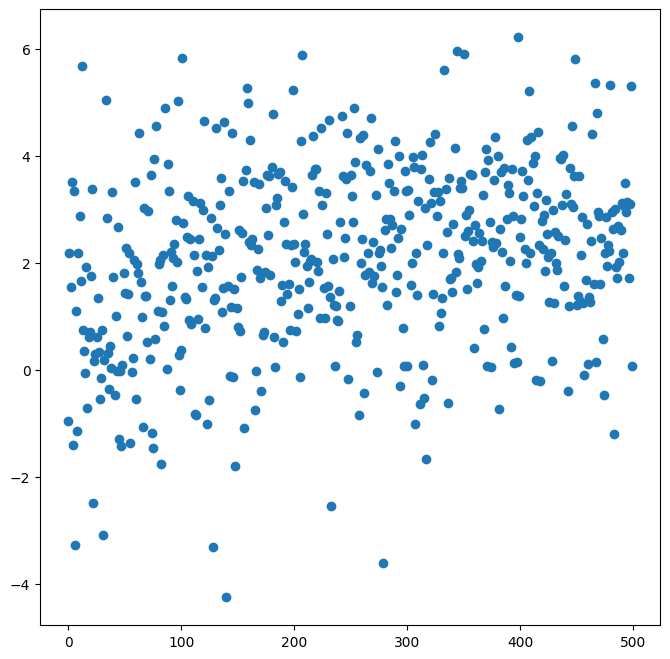

In [6]:
"""
        COMPARE REINFORCE VS MTR
        Remark: Run if you have trained both: Reinforce and Matryoshka.
"""
"""-------------------------------------------------------------------"""
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(1,1,1)
ax1.scatter(range(len(loss_list_1)),loss_list_1, label=f"{agent1.name}: BETA = {agent1.beta}")
ax1.scatter(range(len(loss_list_2)),loss_list_2, label=f"{agent2.name}: BETA = {agent2.beta}")
ax1.scatter(range(len(loss_list_3)),loss_list_3, label=f"{agent3.name}: BETA = {agent3.beta}, TAU = {agent3.tau}")
ax1.scatter(range(len(loss_list_4)),loss_list_4, label=f"{agent4.name}: BETA = {agent4.beta}, TAU = {agent4.tau}")
ax1.set_title(f"Horizon = {HORIZON_MTR}; Game = {GAME_NAME}")
ax1.set_ylabel("Total Reward")
ax1.set_xlabel("Epoch")
ax1.grid()
ax1.legend()
plt.savefig(f'images/{GAME_NAME}_3.jpg', format='jpeg')
plt.show()

In [ ]:
"""
        COMPARE ORIGINAL VS MTRNet VS MTR extra-dim.
        Remark: Run if you have trained both: Original and Matryoshka.
"""
"""-------------------------------------------------------------------"""
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(1,1,1)
ax1.scatter(range(len(loss_list_5)),loss_list_5, label=f"{agent5.name}: BETA = {agent5.beta}, TAU = {agent5.tau}")
ax1.scatter(range(len(loss_list_3)),loss_list_3, label=f"{agent3.name}: BETA = {agent3.beta}, TAU = {agent3.tau}")
ax1.scatter(range(len(loss_list_4)),loss_list_4, label=f"{agent4.name}: BETA = {agent4.beta}, TAU = {agent4.tau}")
ax1.set_title(f"Horizon = {HORIZON_MTR}; Game = {GAME_NAME}")
ax1.set_ylabel("Total Reward")
ax1.set_xlabel("Epoch")
ax1.grid()
ax1.legend()
plt.savefig(f'images/{GAME_NAME}_6.jpg', format='jpeg')
plt.show()

Calculated until horizon 5


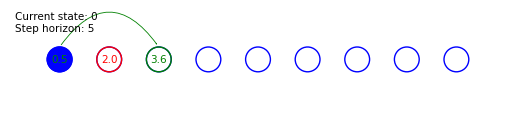

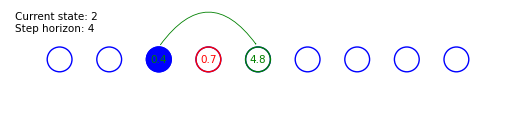

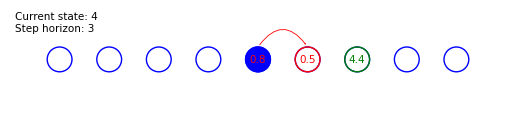

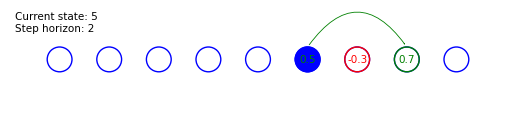

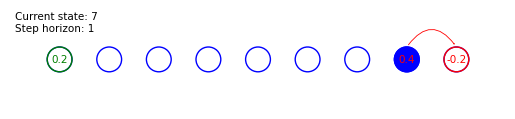

In [6]:
"""
        TEST AGENT
"""
NUMBER_OF_EPISODES = 1
env.generate_all_q_stars(horizon = agent5.horizon, tau = agent5.tau)
"""-------------------------------------------------------------------"""
from enviroment import render
render(agent5,env, NUMBER_OF_EPISODES)

In [10]:
horizon_step = 3
env.generate_all_q_stars(horizon = 5, tau = 1)
print("Q_3")
print(env.q_star[str(horizon_step)])
print("V_3")
print(env.v_star[str(horizon_step)])


Calculated until horizon 5
Q_3
[[ 1.52578395  0.23161361]
 [ 1.73161361  0.34900766]
 [ 0.34900766  1.33519802]
 [ 2.33519802 -1.65625663]
 [ 0.54374337  4.42735915]
 [ 3.92735915  6.11676974]
 [ 6.41676974  5.42696846]
 [ 6.22696846  0.75389534]
 [ 7.55389534 -5.97421605]]
V_3
[0.9590453  1.66035511 3.75457943 5.52976723 6.03963735 5.53801081
 6.86074949 1.07489659 1.26234876]
